# Relátorio de análise I

## Importando base de dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dados = pd.read_csv('data/tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo a base de dados

In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
traducao = {
    'total_bill' : 'valor_total',
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_pessoas'
}

In [5]:
gorjetas = dados.rename(columns=traducao)

In [6]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [7]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
traducao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [9]:
gorjetas['sobremesa'] = gorjetas.sobremesa.map(traducao)

In [10]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [11]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
traducao = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta-feira',
    'Fri' : 'Sexta-feira'
}

In [13]:
gorjetas['dia_da_semana'] = gorjetas.dia_da_semana.map(traducao)

In [14]:
gorjetas.head(10)

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
5,25.29,4.71,Não,Domingo,Dinner,4
6,8.77,2.00,Não,Domingo,Dinner,2
7,26.88,3.12,Não,Domingo,Dinner,4
8,15.04,1.96,Não,Domingo,Dinner,2
9,14.78,3.23,Não,Domingo,Dinner,2


In [15]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [16]:
traducao = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [17]:
gorjetas['hora_do_dia'] = gorjetas.hora_do_dia.map(traducao)

## Utilizando o scatterplot

### Análise I: valor da conta e gorjeta

In [18]:
gorjetas.columns

Index(['valor_total', 'gorjeta', 'sobremesa', 'dia_da_semana', 'hora_do_dia',
       'total_pessoas'],
      dtype='object')

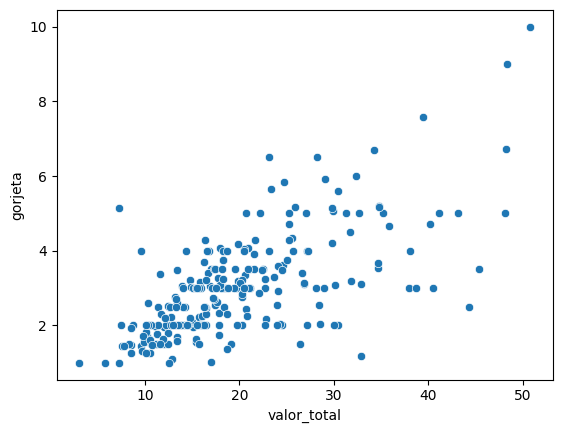

In [19]:
img_valor_gorjeta = sns.scatterplot(x = 'valor_total', y = 'gorjeta', data = gorjetas)

> Visualmente, o valor da gorjeta aumenta proporcionalmente ao valor da conta

In [20]:
print('Registro total do banco de dados: {}'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

Registro total do banco de dados: 244
Registros não nulos:


valor_total      244
gorjeta          244
sobremesa        244
dia_da_semana    244
hora_do_dia      244
total_pessoas    244
dtype: int64

### Criando novo campo porcentagem

In [21]:
gorjetas['porcentagem'] = ((gorjetas['gorjeta'] / gorjetas['valor_total']) * 100).round(2)

In [22]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


### Análise II: valor da conta e porcentagem

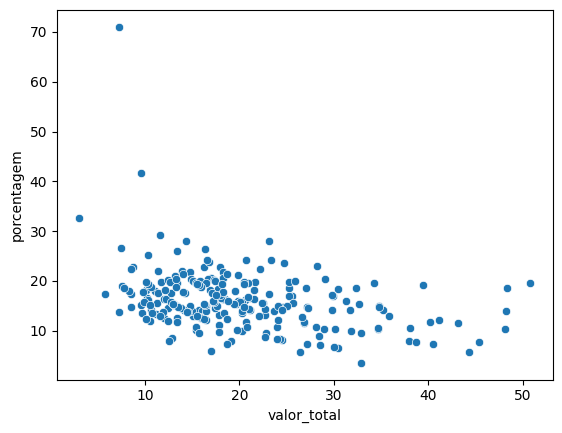

In [23]:
img_valor_porcentagem = sns.scatterplot(x = 'valor_total', y = 'porcentagem', data = gorjetas)

> Visualmente, o proporcional da gorjeta foi decaindo conforme o aumento do valor total

> O valor da conta não é proporcional ao valor da gorjeta.

## Mais sobre seaborn I

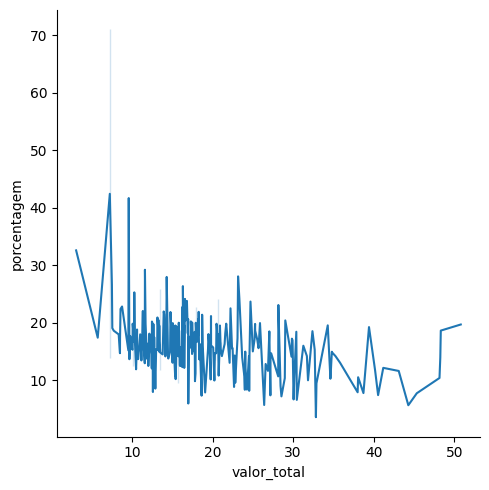

In [24]:
img1 = sns.relplot(x = 'valor_total', y = 'porcentagem', data = gorjetas, kind = 'line')

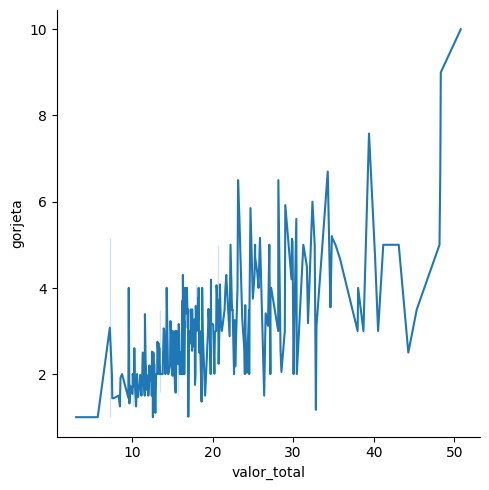

In [25]:
img2 = sns.relplot(x = 'valor_total', y = 'gorjeta', data = gorjetas, kind = 'line')

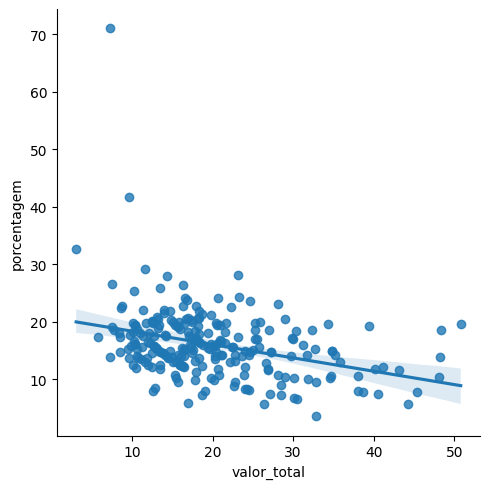

In [26]:
sns.lmplot(x = 'valor_total', y = 'porcentagem', data = gorjetas)

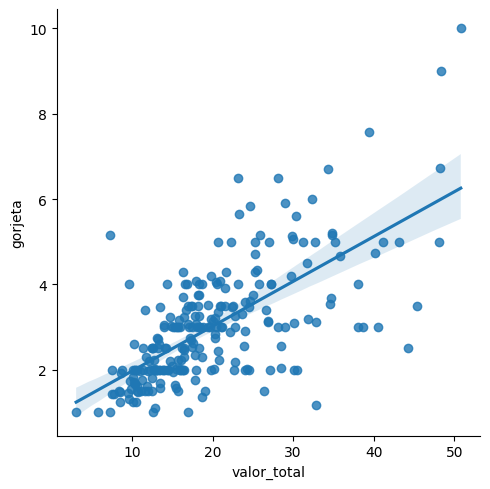

In [27]:
sns.lmplot(x = 'valor_total', y = 'gorjeta', data = gorjetas)

In [28]:
img1.figure.suptitle('Valor x Porcentagem')
img1.set(xlabel = 'Valor total da conta', ylabel = 'Porcentagem da gorjeta')

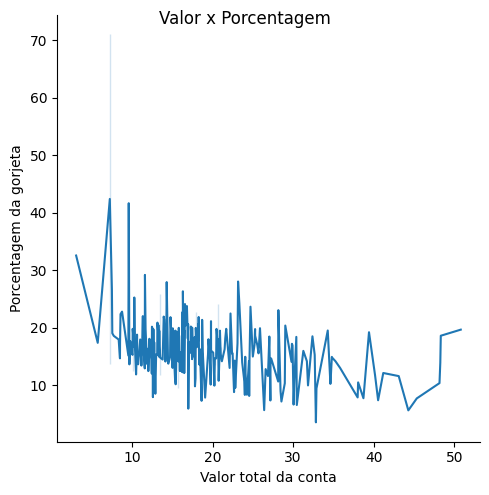

In [29]:
img1.figure

In [30]:
# Salvando a imagem
img1.savefig('imagem.png')

## Mais sobre seaborn II

### Análise III: gorjeta e sobremesa

In [31]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_total,gorjeta,total_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [32]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_total,gorjeta,total_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


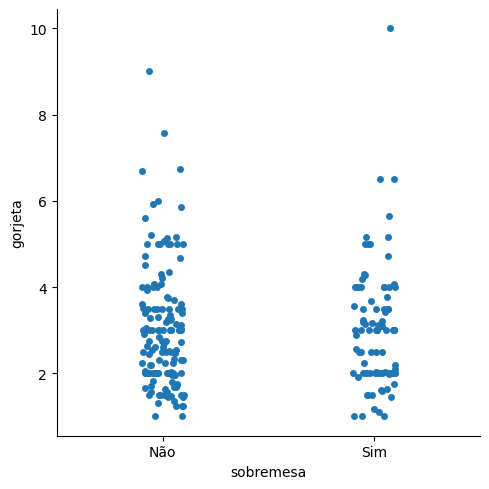

In [34]:
# Criando um gráfico categórico

sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

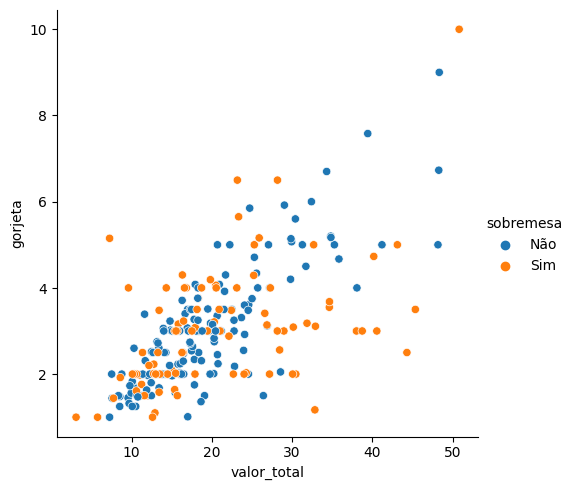

In [35]:
sns.relplot(x = 'valor_total', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

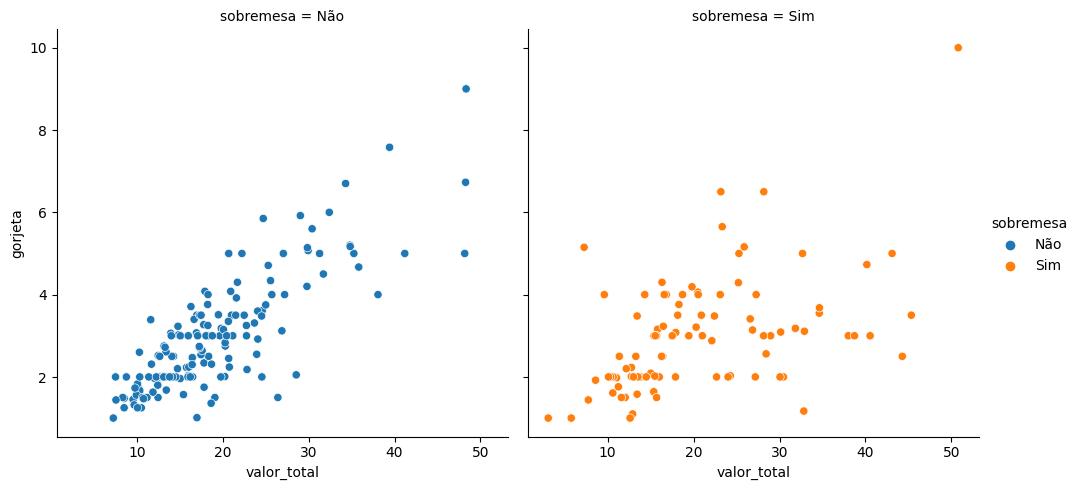

In [42]:
sns.relplot(x = 'valor_total', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

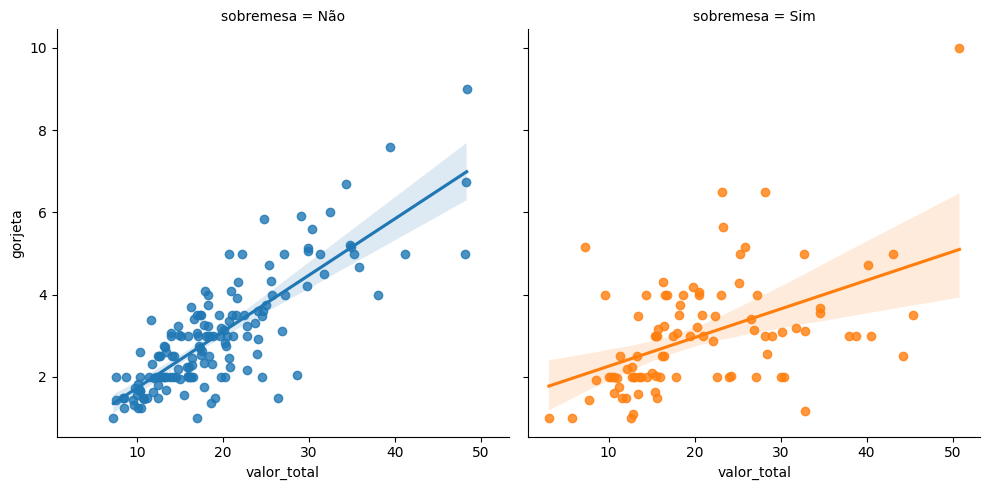

In [40]:
sns.lmplot(x = 'valor_total', y = 'gorjeta', data = gorjetas, col = 'sobremesa', hue = 'sobremesa')

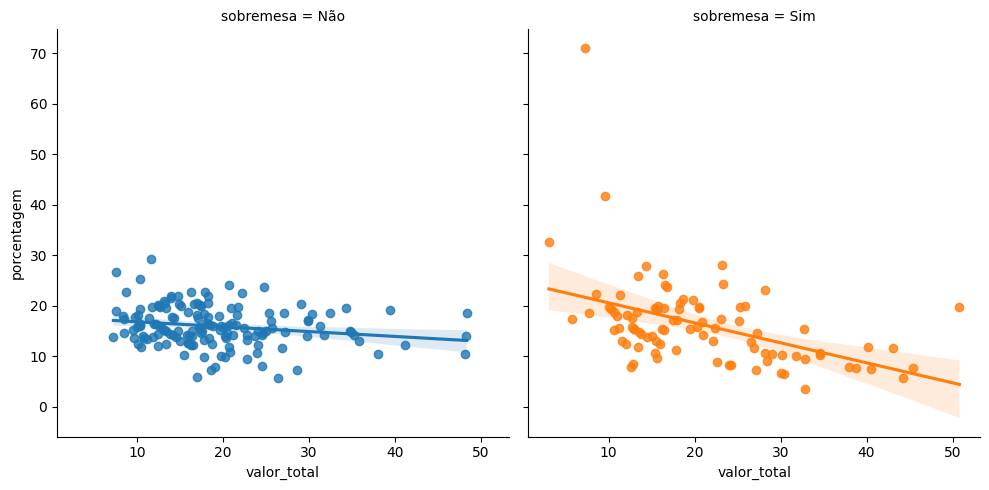

In [43]:
sns.lmplot(x = 'valor_total', y = 'porcentagem', data = gorjetas, col = 'sobremesa', hue = 'sobremesa')

**Visualmente, há uma sutil diferença entre pedir sobremesa ou não para o resultado do valor da gorjeta**

## Teste de hipótese I

In [45]:
from scipy.stats import ranksums

In [48]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [50]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [51]:
r = ranksums(sobremesa, sem_sobremesa)

In [52]:
r

RanksumsResult(statistic=-0.5845504113520769, pvalue=0.558850059321255)

In [54]:
print('O módulo de p-value é: {}'.format(r.pvalue))

O módulo de p-value é: 0.558850059321255


## Mais sobre seaborn III

### Análise IV

In [55]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta-feira', 'Sexta-feira'], dtype=object)

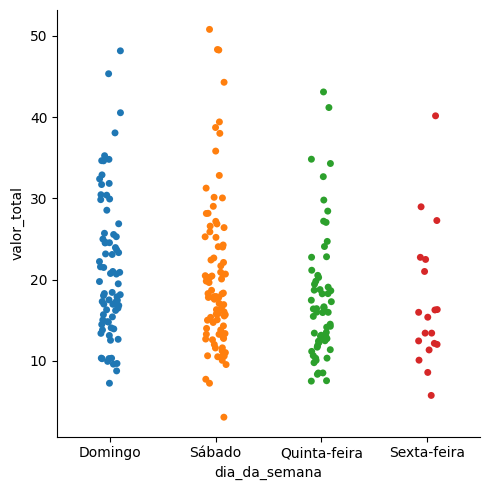

In [59]:
sns.catplot(x = 'dia_da_semana', y = 'valor_total', data = gorjetas, hue = 'dia_da_semana')

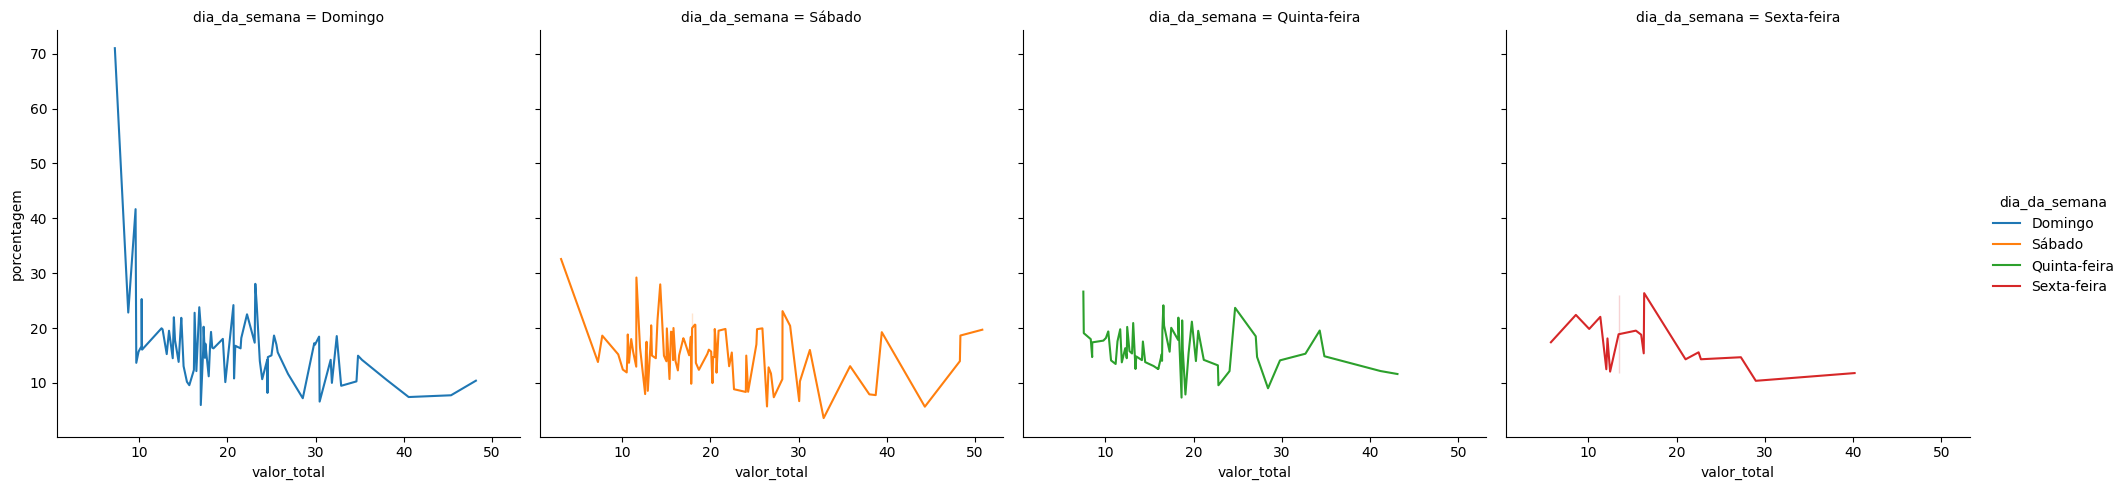

In [65]:
sns.relplot(x = 'valor_total', y = 'porcentagem', data = gorjetas, hue = 'dia_da_semana', col = 'dia_da_semana', kind = 'line')

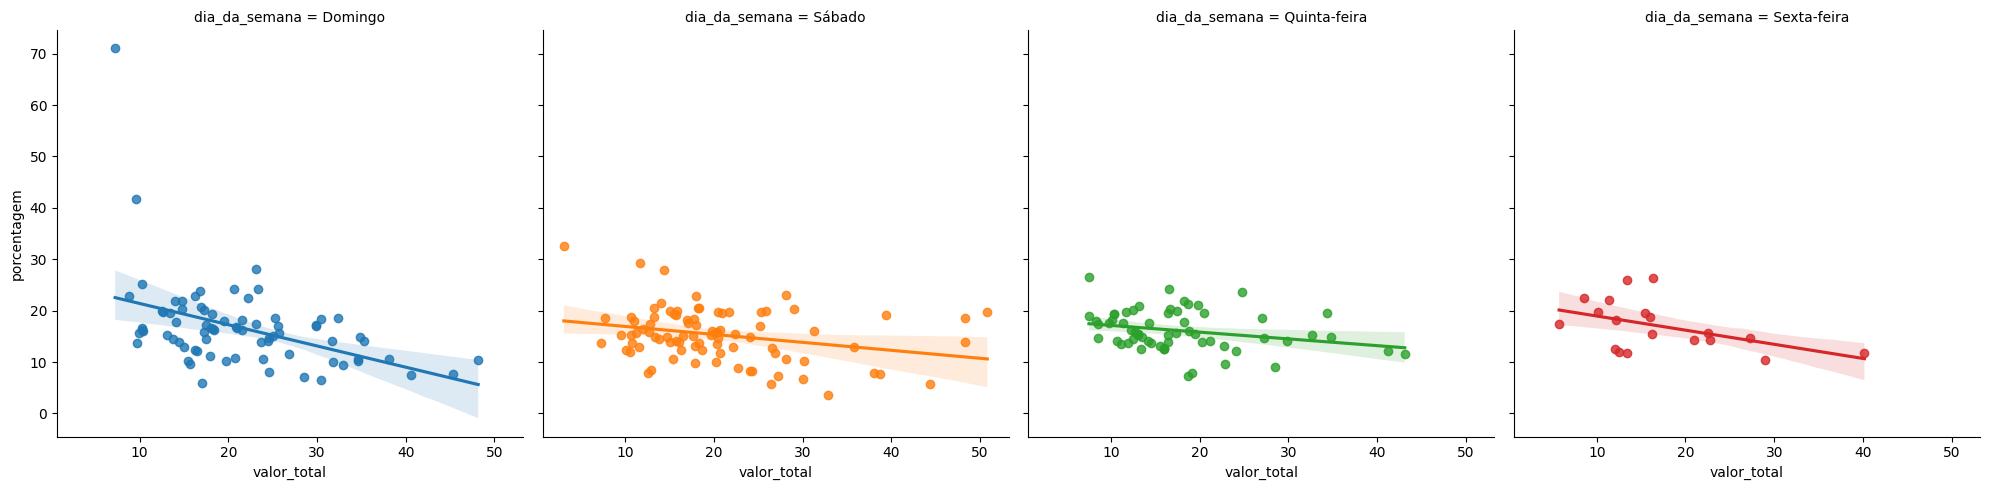

In [66]:
sns.lmplot(x = 'valor_total', y = 'porcentagem', data = gorjetas, hue = 'dia_da_semana', col = 'dia_da_semana')

In [68]:
media_geral_gorjeta = gorjetas.gorjeta.mean()

In [79]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_total', 'gorjeta', 'porcentagem']]

,valor_total,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta-feira,17.682742,2.771452,16.126452
Sexta-feira,17.151579,2.734737,16.991579
Sábado,20.441379,2.993103,15.314598


## Teste de hipótese II

In [87]:
domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_total

In [88]:
sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_total

In [89]:
r = ranksums(domingo, sabado)

In [90]:
r.pvalue

0.3576728477868443